In [1]:
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# # 데이터 읽어오기
# file_path = 'D:\\Dataset\\#4_전력 설비 에너지 패턴 및 고장 분석 센서\\Training\\1.펌프_일반모터\\1.기동패턴\\1.전류평균\\0.Combined\\'
# files = ['Combined_LabelledData_52_전류평균.json', 'Combined_LabelledData_56_전류평균.json']

# x_label = []
# y_label = []

# for file_name in files:
#     full_path = file_path + file_name
#     with open(full_path, 'r', encoding='utf-8') as file:
#         data = json.load(file)

#     for entry in data['data']:
#         if entry['ITEM_NAME'] == "전류평균":
#             x_label.append(entry['ITEM_VALUE'])
#             y_label.append(entry['LABEL_NAME'])

# # 데이터를 pandas DataFrame으로 변환
# df = pd.DataFrame({'x_label': x_label, 'y_label': y_label})

# # rolling median 적용
# window_size = 3  # 윈도우 크기 설정
# df['rolling_median'] = df['x_label'].rolling(window=window_size, center=True).median()

# # 전처리된 데이터 시각화
# colors = {'Loading': 'red', 'Unloading': 'green', 'Stop': 'blue'}

# plt.scatter(df['x_label'], np.random.randn(len(df['x_label'])), c=[colors[label] for label in df['y_label']], label='Original Data')
# plt.plot(df['x_label'], np.random.randn(len(df['x_label'])), color='gray', alpha=0.5, label='Original Data')
# plt.plot(df['rolling_median'], np.random.randn(len(df['rolling_median'])), color='orange', label=f'Rolling Median (window_size={window_size})')
# plt.xlabel('Standard x_label')
# plt.ylabel('')
# plt.title('Data Visualization with Rolling Median')
# plt.legend()
# plt.show()


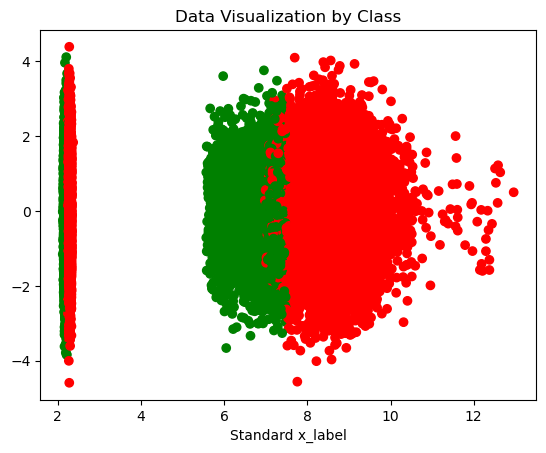

In [3]:
# file_path = 'D:\\Dataset\\#4_전력 설비 에너지 패턴 및 고장 분석 센서\\Training\\1.펌프_일반모터\\2.SOH진단\\1.역률평균\\0.Combined\\'
# files = ['Combined_LabelledData_346_역률평균.json', 'Combined_LabelledData_348_역률평균.json']

# x_label = []
# y_label = []

# for file_name in files:
#     full_path = file_path + file_name
#     with open(full_path, 'r', encoding='utf-8') as file:
#         data = json.load(file)

#     for entry in data['data']:
#         if entry['ITEM_NAME'] == "역률평균":
#             x_label.append(entry['ITEM_VALUE'])
#             y_label.append(entry['LABEL_NAME'])


# print(x_label)

file_path = 'D:\\Dataset\\#4_전력 설비 에너지 패턴 및 고장 분석 센서\\Training\\1.펌프_일반모터\\1.기동패턴\\1.전류평균\\0.Combined\\'
files = ['Combined_LabelledData_52_전류평균.json', 'Combined_LabelledData_56_전류평균.json']

x_label = []
y_label = []

for file_name in files:
    full_path = file_path + file_name
    with open(full_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    for entry in data['data']:
        if entry['ITEM_NAME'] == "전류평균":
            x_label.append(entry['ITEM_VALUE'])
            y_label.append(entry['LABEL_NAME'])

x_label = np.array(x_label)
# x_label_scaled = (x_label - np.mean(x_label)) / np.std(x_label)



colors = {'Loading': 'red', 'Unloading': 'green', 'Stop': 'blue'}

plt.scatter(x_label, np.random.randn(len(x_label)), c=[colors[label] for label in y_label])
plt.xlabel('Standard x_label')
plt.ylabel('')
plt.title('Data Visualization by Class')
plt.show()

[58014, 28386, 0]


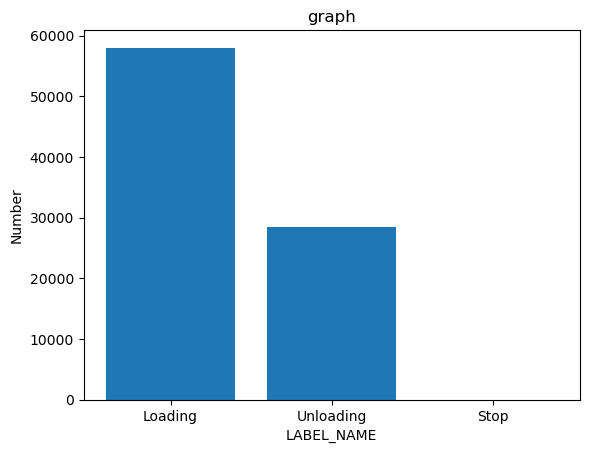

In [4]:
label_counts = {'Loading': 0, 'Unloading': 0, 'Stop': 0}

for label in y_label:
    label_counts[label] += 1

labels = list(label_counts.keys())
counts = list(label_counts.values())

print(counts)

plt.bar(['Loading', 'Unloading', 'Stop'], counts)
plt.xlabel('LABEL_NAME')
plt.ylabel('Number')
plt.title('graph')
plt.show()

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 데이터 생성 및 섞기
data_indices = np.arange(len(x_label))
np.random.shuffle(data_indices)

x_label = np.array(x_label)[data_indices]
y_label = np.array(y_label)[data_indices]

# 문자열 레이블을 정수형으로 변환
label_mapping = {'Loading': 0, 'Unloading': 1}
y_label = np.vectorize(lambda x: label_mapping[x])(y_label.astype(str))

# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.4, random_state=42)

# Keras를 사용한 로지스틱 회귀 모델 생성
model = Sequential([
    Dense(1, input_shape=(1,), activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

model.save('model.h5')

# 테스트 데이터로 평가
accuracy_keras = model.evaluate(x_test, y_test)[1]
print(f'Keras Logistic Regression Accuracy: {accuracy_keras}')


Epoch 1/200
2592/2592 [==============================] - 2s 741us/step - loss: 0.8164 - accuracy: 0.6559 - val_loss: 0.5694 - val_accuracy: 0.6294
Epoch 2/200
2592/2592 [==============================] - 2s 689us/step - loss: 0.5654 - accuracy: 0.6303 - val_loss: 0.5679 - val_accuracy: 0.6294
Epoch 3/200
2592/2592 [==============================] - 2s 694us/step - loss: 0.5645 - accuracy: 0.6746 - val_loss: 0.5678 - val_accuracy: 0.7591
Epoch 4/200
2592/2592 [==============================] - 2s 692us/step - loss: 0.5644 - accuracy: 0.7430 - val_loss: 0.5677 - val_accuracy: 0.6395
Epoch 5/200
2592/2592 [==============================] - 2s 679us/step - loss: 0.5644 - accuracy: 0.7453 - val_loss: 0.5679 - val_accuracy: 0.6294
Epoch 6/200
2592/2592 [==============================] - 2s 732us/step - loss: 0.5644 - accuracy: 0.7319 - val_loss: 0.5677 - val_accuracy: 0.8578
Epoch 7/200
2592/2592 [==============================] - 2s 689us/step - loss: 0.5644 - accuracy: 0.7514 - val_loss: 0

In [6]:
data_indices = np.arange(len(x_label))

print(data_indices)

np.random.shuffle(data_indices)

print(data_indices)

x_label = np.array(x_label)[data_indices]
y_label = np.array(y_label)[data_indices]

x_train, x_test, y_train, y_test = train_test_split(x_label, y_label, test_size=0.4, random_state=42)

# 로지스틱 회귀 모델 생성
logistic_model = LogisticRegression()
logistic_model.fit(x_train.reshape(-1, 1), y_train)

y_pred = logistic_model.predict(x_test.reshape(-1, 1))

accuracy_logistic = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy_logistic}')

# # 'Loading' 값을 0으로 대체
# y_train[y_train == 'Loading'] = 0
# # 'Loading' 값을 0으로 대체
# y_train[y_train == 'Unloading'] = 1
# # 'Loading' 값을 0으로 대체
# y_test[y_test == 'Loading'] = 0
# # 'Loading' 값을 0으로 대체
# y_test[y_test == 'Unloading'] = 1

# x_train = x_train.astype(float)
# x_test = x_test.astype(float)

# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers.experimental import RandomFourierFeatures

# model = keras.Sequential(
#     [
#         keras.Input(shape=(1,)),
#         layers.Flatten(),
#         RandomFourierFeatures(
#             output_dim=128, scale=0.1, kernel_initializer="gaussian"
#         ),
#         layers.Dense(units=2),
#     ]
# )

# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1e-3),
#     loss=keras.losses.hinge,
#     metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
# )

# history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

[    0     1     2 ... 86397 86398 86399]
[57693 56167 76263 ... 36637 47927 73131]
Logistic Regression Accuracy: 0.7604456018518518


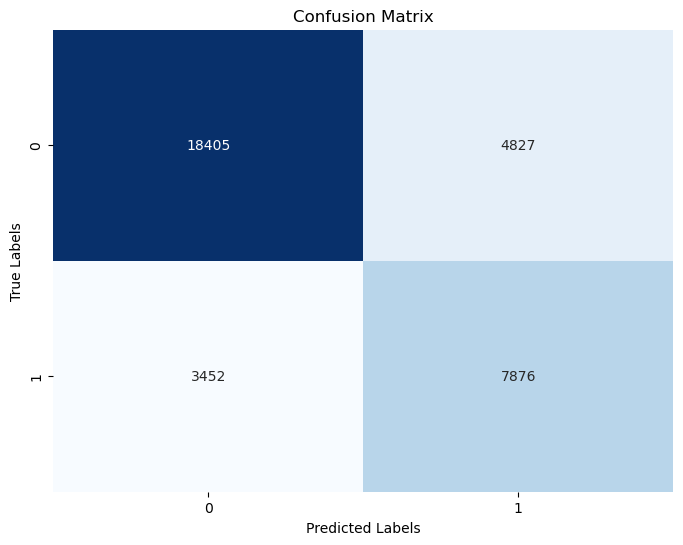

In [7]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

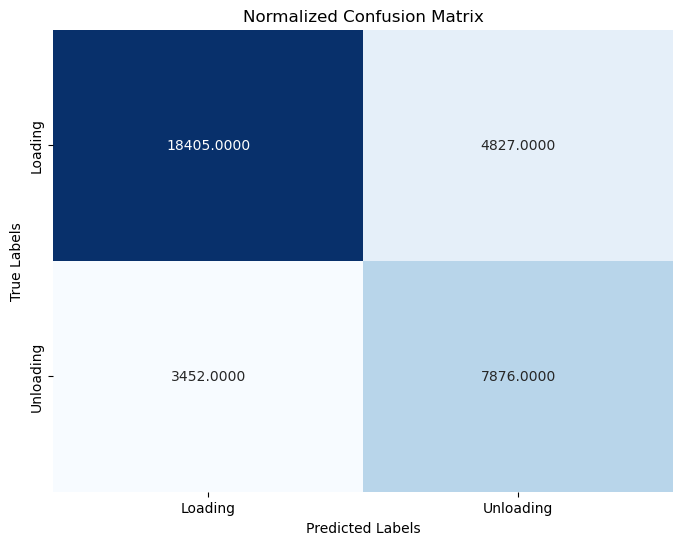

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.4f', cmap='Blues', cbar=False,xticklabels=['Loading', 'Unloading'], yticklabels=['Loading', 'Unloading'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

In [9]:
# new_data = np.random.rand(1,16)*1.2

# predictions = svm_model.predict(new_data.reshape(-1, 1))

# print(new_data, predictions)

# for i in range(0,16):
#     print("---------------------------------------------------------------")
#     print("new_data : ",new_data[0][i])
#     print("pred_class : ",predictions[i])
    
# print('-------------------------------------------------------------------')

In [10]:
new_data = np.random.rand(1,16)*15

predictions = logistic_model.predict(new_data.reshape(-1, 1))

print(new_data, predictions)

for i in range(0,16):
    print("---------------------------------------------------------------")
    print("new_data : ",new_data[0][i])
    print("pred_class : ",predictions[i])
    
print('-------------------------------------------------------------------')

[[ 7.14216854 10.91411395 10.98586807  9.07734998 11.85472307 10.38575804
   6.00808022  2.78285919  1.20110263  0.62510392 12.19706362  2.21548807
   4.43852363 11.40726567 10.84673554 12.14546713]] [0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
---------------------------------------------------------------
new_data :  7.142168543269895
pred_class :  0
---------------------------------------------------------------
new_data :  10.914113949790224
pred_class :  0
---------------------------------------------------------------
new_data :  10.985868072199754
pred_class :  0
---------------------------------------------------------------
new_data :  9.077349983167796
pred_class :  0
---------------------------------------------------------------
new_data :  11.854723069005674
pred_class :  0
---------------------------------------------------------------
new_data :  10.385758035907035
pred_class :  0
---------------------------------------------------------------
new_data :  6.008080218520699
pred_cla